# Image classification using CNNs in Keras - Plant Seedlings Classification

### Data Description:

You are provided with a dataset of images of plant seedlings at various stages of grown. 
Each image has a filename that is its unique id. The dataset comprises 12 plant species. 
The goal of the project is to create a classifier capable of determining a plant's species from a photo.

### Dataset:
The dataset can be download from Olympus.
The data file names are:
    images.npy
    Label.csv
    
### Objective:
To implement the techniques learnt as a part of the Computer Vision course

# 1. Import libraries, load dataset, print shape of data, visualize image.

In [1]:
# To check for GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
# To mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **1.1 Importing the libraries**

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

import cv2
import os

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to import deeplearning library
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from tensorflow.keras.optimizers  import Adam
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import adam_v2 #optimiers for optimizing the model
from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers 

### **1.2 Load dataset**

In [4]:
#To load the impages in numpy array
trainImg = np.load('/content/drive/My Drive/Colab Notebooks/images.npy')  

In [5]:
#To load the labels from csv files
trainLabel = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Labels.csv')  

In [6]:
trainLabel

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


### **1.3 shape of data**

In [7]:
print(len(trainImg))

4750


In [8]:
print(trainImg.shape)

(4750, 128, 128, 3)


### **1.4 visualize the images**

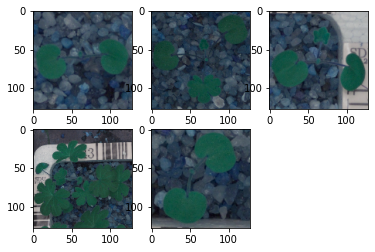

In [9]:
for i in range(5):
    plt.subplot(2, 3, i + 1)
    #img = img.reshape((150,150))
    plt.imshow(trainImg[i], cmap='gray')    

In [10]:
labels_DF = pd.DataFrame(trainLabel)

In [11]:
labels_DF.dtypes

Label    object
dtype: object

In [12]:
labels_DF["Label"]      = labels_DF["Label"].astype("category")

In [13]:
cols_cat= labels_DF.select_dtypes(['category'])
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in Label are :
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
Name: Label, dtype: int64
**************************************************


**The Data looks unbalanced because we have different counts of images of different species**

In [14]:
#To check for the missing values
labels_DF.isna().sum()

Label    0
dtype: int64

In [15]:
labels_DF.nunique()

Label    12
dtype: int64

**The number of classes is 12**

### **1.5  Exploratory Data Analysis on the images**

In [16]:
#creating the dataframe to plot the pie chart
df=pd.DataFrame(trainLabel)

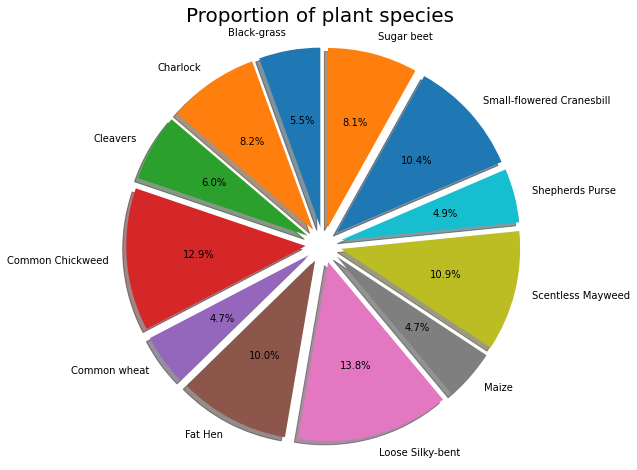

In [26]:
#plotting the pie chart 
labels = 'Black-grass','Charlock','Cleavers','Common Chickweed','Common wheat','Fat Hen','Loose Silky-bent','Maize','Scentless Mayweed','Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet'
sizes = [df.Label[df['Label'] == 'Black-grass'].count(), df.Label[df['Label'] == 'Charlock'].count(), 
         df.Label[df['Label'] == 'Cleavers'].count(), df.Label[df['Label'] == 'Common Chickweed'].count(), 
         df.Label[df['Label'] == 'Common wheat'].count(), df.Label[df['Label'] == 'Fat Hen'].count(), 
         df.Label[df['Label'] == 'Loose Silky-bent'].count(), df.Label[df['Label'] == 'Maize'].count(), 
         df.Label[df['Label'] == 'Scentless Mayweed'].count(), df.Label[df['Label'] == 'Shepherds Purse'].count(), 
         df.Label[df['Label'] == 'Small-flowered Cranesbill'].count(), df.Label[df['Label'] == 'Sugar beet'].count()
         ]
explode = (.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of plant species ", size = 20)
plt.show()

# 2. Data Pre-processing:

### **2.1. Gaussian Blurring**

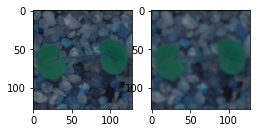

In [ ]:
clearTrainImg = []
examples = []; getEx = True
for img in trainImg:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
         
    # Show examples
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
        getEx = False

***The above image shows the original and Blur image. But the image has some the background like paper labels. 
So we need to remove the background to achieve a better model accuracy.***


**Cleaning the image data**

Since the leaves are in green color, We can create a mask which will leave some range of green color and remove other part of images. This process will remove the background other than green shades of color.

Process:
- Use gaussian blur for remove noise
- Convert color to HSV
- Create mask
- Create boolean mask
- Apply boolean mask and getting image whithout background

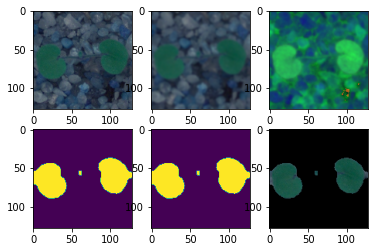

In [ ]:
clearTrainImg = []
examples = []; getEx = True
for img in trainImg:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
    
    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Create bool mask
    bMask = mask > 0  
    
    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    
    clearTrainImg.append(clear)  # Append image without backgroung
    
    # Show examples
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV image
        plt.subplot(2, 3, 4); plt.imshow(mask)  # Mask
        plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
        plt.subplot(2, 3, 6); plt.imshow(clear)  # Image without background
        getEx = False

clearTrainImg = np.asarray(clearTrainImg)

- The final image shows that we have removed the backgrounds in the image

**To check for other images:**

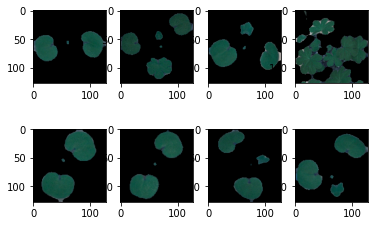

In [ ]:
# Show sample result
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(clearTrainImg[i])

- The background has been removed for the images.

### **2.2  Normalization.**

In [ ]:
# Normalize the data
clearTrainImg = clearTrainImg / 255

### **2.3 Visualize data after pre-processing.**

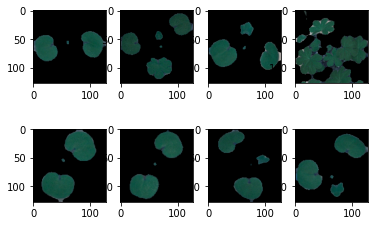

In [ ]:
# Show sample result
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(clearTrainImg[i])

- The background has been removed and showing only the range of green colours. 

# 3. Make data compatible:

### **3.1 Convert labels to one-hot-vectors.**


- We will now encode the image labels with 12 names of plant species and encode every label by the position in the array.

Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Number of classes: 12


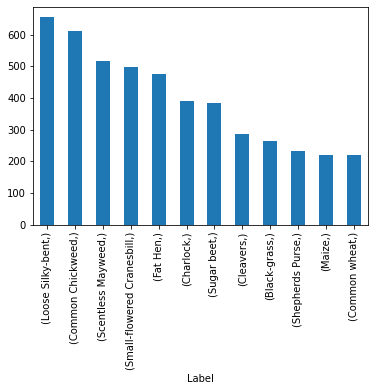

In [ ]:
from keras.utils import np_utils
from sklearn import preprocessing
import matplotlib.pyplot as plt

labels_DF = pd.DataFrame(trainLabel)

# Encode labels and create classes
le = preprocessing.LabelEncoder()
le.fit(labels_DF)
print("Classes: " + str(le.classes_))
encodeTrainLabels = le.transform(labels_DF)

# Make labels categorical
clearTrainLabel = np_utils.to_categorical(encodeTrainLabels)
num_clases = clearTrainLabel.shape[1]
print("Number of classes: " + str(num_clases))

# Plot of label types numbers
labels_DF.value_counts().plot(kind='bar')

### **3.2 Split the dataset into training, testing, and validation set.**

In [ ]:
X = clearTrainImg
y = clearTrainLabel
# Split data into test and train to build the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=7, stratify = y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(1425, 128, 128, 3)
(3325, 12)
(1425, 12)


In [ ]:
# Split data into test and train to build the model.
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, random_state=7, stratify = y_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(3325, 128, 128, 3)
(712, 128, 128, 3)
(713, 128, 128, 3)
(3325, 12)
(712, 12)
(713, 12)


In [ ]:
encoded = np.array(y_train)
y_train_e = encoded
encoded_test = np.array(y_test)
y_test_e = encoded_test

### **3.3 To print the label.**

In [ ]:
y_train_DF = pd.DataFrame(y_train)
y_train_DF

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3320,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3321,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3323,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### **3.4 Shape of data.**

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(3325, 128, 128, 3)
(712, 128, 128, 3)
(713, 128, 128, 3)
(3325, 12)
(712, 12)
(713, 12)


- The shape of data is already in compatible shape with Keras models

# 4. Building CNN Model

### **4.1 Define layers.**

**Model 1:** 
- CNN with Dropout

- I've created a model with 5 convolutional layers and two fully-connected layers in the end.
- First two convolutional layers have 64 filters, next have 128 filters and the last layer have one 256 filters. 
- After each pair of convolution layers model have max pooling layer.
- To reduce overfitting after each pair of convolution layers we use dropout layer.
- In the last layer the neural net outputs probability for each of 12 classes.

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model = Sequential()
#
y_train=np.array(y_train)

#
model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

#
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding = 'Same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

#
model.add(Conv2D(filters=128, kernel_size=(5, 5), padding = 'Same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

#
model.add(Conv2D(filters=128, kernel_size=(5, 5), padding = 'Same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

#
model.add(Conv2D(filters=256, kernel_size=(5, 5), padding = 'Same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

#
model.add(Flatten())

#
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))

model.summary()

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 128)       2

In [ ]:
epochs = 200  
batch_size = 64

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history=model.fit(X_train, y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training  

Epoch 1/30
42/42 [==============================] - 39s 205ms/step - loss: 2.4568 - accuracy: 0.1421 - val_loss: 2.2074 - val_accuracy: 0.2647

Epoch 00001: val_accuracy improved from -inf to 0.26466, saving model to best_model.h5
Epoch 2/30
42/42 [==============================] - 6s 147ms/step - loss: 2.0003 - accuracy: 0.2850 - val_loss: 1.7456 - val_accuracy: 0.4000

Epoch 00002: val_accuracy improved from 0.26466 to 0.40000, saving model to best_model.h5
Epoch 3/30
42/42 [==============================] - 6s 147ms/step - loss: 1.6891 - accuracy: 0.3989 - val_loss: 1.4931 - val_accuracy: 0.4436

Epoch 00003: val_accuracy improved from 0.40000 to 0.44361, saving model to best_model.h5
Epoch 4/30
42/42 [==============================] - 6s 147ms/step - loss: 1.4604 - accuracy: 0.4801 - val_loss: 1.2835 - val_accuracy: 0.5504

Epoch 00004: val_accuracy improved from 0.44361 to 0.55038, saving model to best_model.h5
Epoch 5/30
42/42 [==============================] - 6s 148ms/step - lo

- This model does not have a good test accuracy. We we need to increase the complexity of the model in our next model.

**Model 2:** 
- CNN with Dropout after Convolution and having two Dense layers with 256 & 256 Units respectively 

- I've created a model with 6 convolutional layers and three fully-connected layers in the end.
- First two convolutional layers have 64 filters, next have 128 filters and the last layers have 256 filters. 
- After each pair of convolution layers model have max pooling layer.
- To reduce overfitting after each pair of convolution layers we use dropout layer.
- In the last layer the neural net outputs probability for each of 12 classes.

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model2 = Sequential()
#
y_train=np.array(y_train)

#
model2.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(128, 128, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.1))

#
model2.add(Conv2D(filters=64, kernel_size=(5, 5), padding = 'Same', activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.1))

#
model2.add(Conv2D(filters=128, kernel_size=(5, 5), padding = 'Same', activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.1))

#
model2.add(Conv2D(filters=128, kernel_size=(5, 5), padding = 'Same', activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.1))

#
model2.add(Conv2D(filters=256, kernel_size=(5, 5), padding = 'Same', activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.1))

#
model2.add(Conv2D(filters=256, kernel_size=(5, 5), padding = 'Same', activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.1))

#
model2.add(Flatten())

#
model2.add(Dense(256, activation = "relu"))
model2.add(Dropout(0.5))
model2.add(Dense(256, activation = "relu"))
model2.add(Dropout(0.5))
model2.add(Dense(12, activation = "softmax"))

model2.summary()

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model2.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 124, 124, 64)      4864      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 62, 62, 64)        102464    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 31, 31, 128)      

In [ ]:
epochs = 200  
batch_size = 128

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history2=model2.fit(X_train, y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=128,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training  

Epoch 1/30
21/21 [==============================] - 16s 490ms/step - loss: 2.4625 - accuracy: 0.1139 - val_loss: 2.4266 - val_accuracy: 0.0992

Epoch 00001: val_accuracy improved from -inf to 0.09925, saving model to best_model.h5
Epoch 2/30
21/21 [==============================] - 6s 292ms/step - loss: 2.3551 - accuracy: 0.1936 - val_loss: 2.2379 - val_accuracy: 0.2662

Epoch 00002: val_accuracy improved from 0.09925 to 0.26617, saving model to best_model.h5
Epoch 3/30
21/21 [==============================] - 6s 291ms/step - loss: 2.1900 - accuracy: 0.2688 - val_loss: 1.9907 - val_accuracy: 0.3158

Epoch 00003: val_accuracy improved from 0.26617 to 0.31579, saving model to best_model.h5
Epoch 4/30
21/21 [==============================] - 6s 292ms/step - loss: 1.8501 - accuracy: 0.3485 - val_loss: 1.6596 - val_accuracy: 0.3639

Epoch 00004: val_accuracy improved from 0.31579 to 0.36391, saving model to best_model.h5
Epoch 5/30
21/21 [==============================] - 6s 290ms/step - lo

**CNN Model 1**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


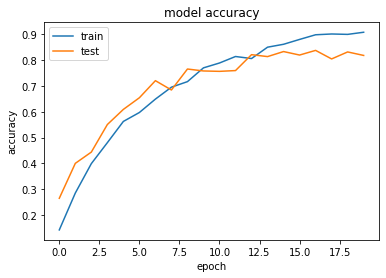

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**CNN Model 2**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


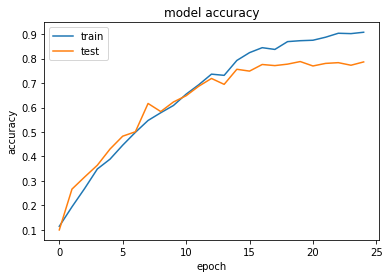

In [ ]:
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 5. Evaluate model and print confusion matrix

### **Model Evaluation**

**CNN Model 1**

In [ ]:
model.evaluate(X_test,y_test_e)

23/23 [==============================] - 2s 41ms/step - loss: 0.8723 - accuracy: 0.7823


[0.8722911477088928, 0.7823033928871155]

**CNN Model 2**

In [ ]:
model2.evaluate(X_test,y_test_e)

23/23 [==============================] - 1s 36ms/step - loss: 0.9066 - accuracy: 0.7416


[0.9066381454467773, 0.7415730357170105]

### **Plotting the confusion matrix for the two best models** 

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**CNN Model 1**

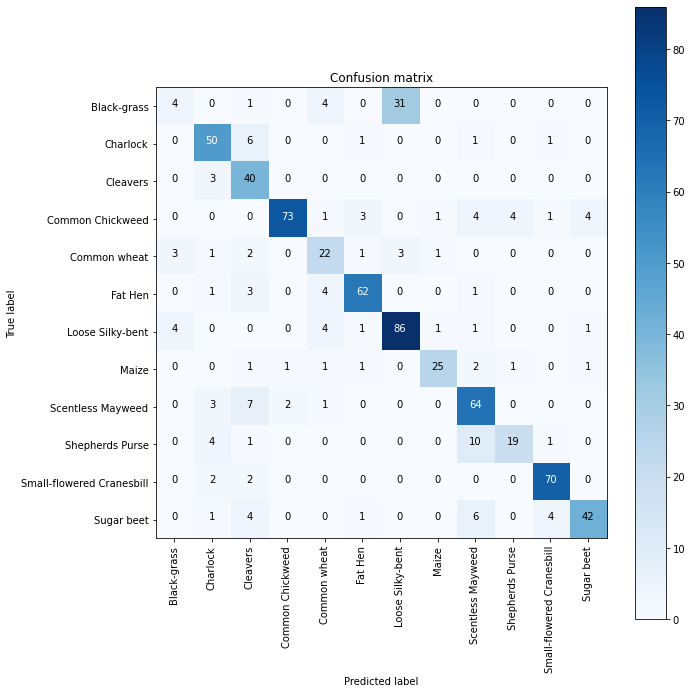

In [ ]:
# Predict the values from the validation dataset
predY = model.predict(X_test)
predYClasses = np.argmax(predY, axis = 1) 
trueY = np.argmax(y_test, axis = 1) 

# confusion matrix
confusionMTX = confusion_matrix(trueY, predYClasses) 

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = le.classes_) 

***Observations:***
- Most of Black grass has been identifed as Loose Silky bent.
- Some of Shepherds purse is idenfied as Scentless Mayweed.
- The other plant species are mostly identified correctly.       

**CNN Model 2**

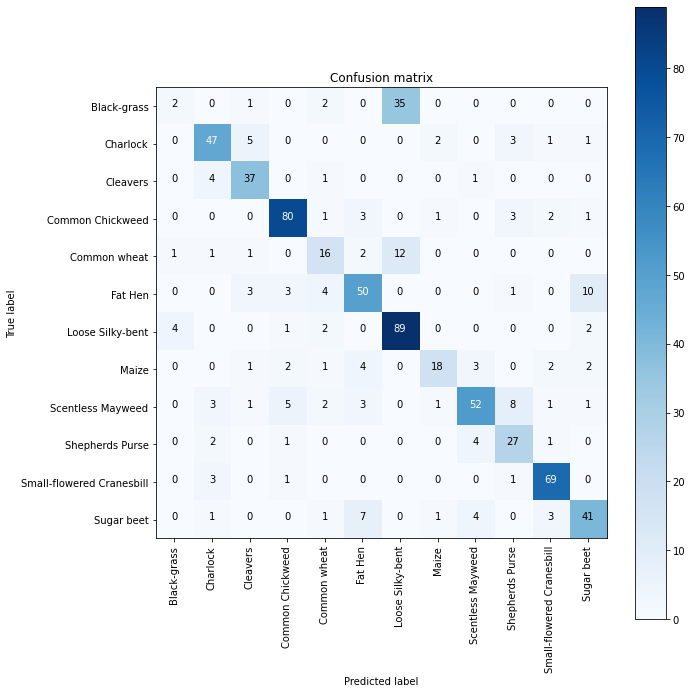

In [ ]:
# Predict the values from the validation dataset
predY2 = model2.predict(X_test)
predYClasses2 = np.argmax(predY2, axis = 1) 
trueY2 = np.argmax(y_test, axis = 1) 

# confusion matrix
confusionMTX = confusion_matrix(trueY2, predYClasses2) 

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = le.classes_) 

***Observations:***
- Most of Black grass has been identifed as Loose Silky bent.
- Some of Common wheat is idenfied as Loose Silky bent.
- Some of Fat Hen is idenfied as Sugar beet.
- The other plant species are mostly identified correctly.    

## 6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59].

In [ ]:
def plot_visualize(input):
    if(i == 0):
        plt.title("Black-grass")
    if(i==1):
        plt.title("Charlock")
    if(i==2):
        plt.title("Cleavers")
    if(i==3):
        plt.title("Common_Chickweed")
    if(i==4):
        plt.title("Common_wheat")
    if(i==5):
        plt.title("Fat_Hen")
    if(i == 6):
        plt.title("Loose_Silky-bent")
    if(i==7):
        plt.title("Maize")
    if(i==8):
        plt.title("Scentless_Mayweed")
    if(i==9):
        plt.title("Shepherds_Purse")
    if(i==10):
        plt.title("Small-flowered_Cranesbill")
    if(i==11):
        plt.title("Sugar_beet")

    plt.axis('off')
    plt.show()


In [ ]:
def Display_predictions(input):
    if(i == 0):
        print("Black-grass")
    if(i==1):
        print("Charlock")
    if(i==2):
        print("Cleavers")
    if(i==3):
        print("Common_Chickweed")
    if(i==4):
        print("Common_wheat")
    if(i==5):
        print("Fat_Hen")
    if(i == 6):
        print("Loose_Silky-bent")
    if(i==7):
        print("Maize")
    if(i==8):
        print("Scentless_Mayweed")
    if(i==9):
        print("Shepherds_Purse")
    if(i==10):
        print("Small-flowered_Cranesbill")
    if(i==11):
        print("Sugar_beet")

I will visualize the predictions for some of test data on the Model created. I will be using Model 1 since the accuracy was much better than Model 2. 

### **6.1 Visualize predictions for x_test[2]** 

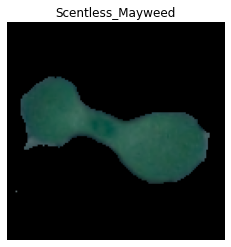

In [ ]:
#fn = image.load_img(fp, target_size = (150,150), color_mode='grayscale')
plt.imshow(X_test[2].reshape(128,128,3), cmap='Greys_r')
i=y_test[2]
i=np.argmax(i)
plot_visualize(i)

In [ ]:
res=model.predict(X_test[2].reshape(1, 128, 128, 3))

In [ ]:
i=np.argmax(res)
Display_predictions(i)

Scentless_Mayweed


- The Model has predicted the plant species 'Scentless Mayweed' correctly.

### **6.2 Visualize predictions for x_test[3]** 

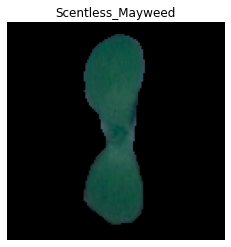

In [ ]:
#fn = image.load_img(fp, target_size = (150,150), color_mode='grayscale')
plt.imshow(X_test[3].reshape(128,128,3), cmap='Greys_r')
i=y_test[3]
i=np.argmax(i)
plot_visualize(i)

In [ ]:
res=model.predict(X_test[3].reshape(1, 128, 128, 3))

In [ ]:
i=np.argmax(res)
Display_predictions(i)

Scentless_Mayweed


- The Model has predicted the plant species 'Scentless Mayweed' correctly.

### **6.3 Visualize predictions for x_test[33]** 

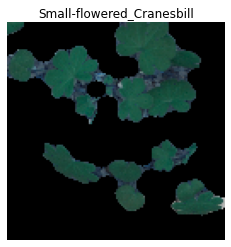

In [ ]:
plt.imshow(X_test[33].reshape(128,128,3), cmap='Greys_r')
i=y_test[33]
i=np.argmax(i)
plot_visualize(i)

In [ ]:
res=model.predict(X_test[33].reshape(1, 128, 128, 3))

In [ ]:
i=np.argmax(res)
Display_predictions(i)

Small-flowered_Cranesbill


- The Model has predicted the plant species 'Small-flowered_Cranesbill' correctly.

### **6.4 Visualize predictions for x_test[36]** 

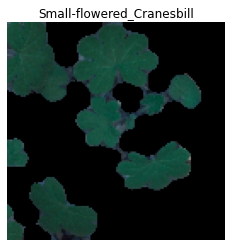

In [ ]:
plt.imshow(X_test[36].reshape(128,128,3), cmap='Greys_r')
i=y_test[36]
i=np.argmax(i)
plot_visualize(i)

In [ ]:
res=model.predict(X_test[36].reshape(1, 128, 128, 3))

In [ ]:
i=np.argmax(res)
Display_predictions(i)

Small-flowered_Cranesbill


- The Model has predicted the plant species 'Small-flowered_Cranesbill' correctly.

### **6.5 Visualize predictions for x_test[59]** 

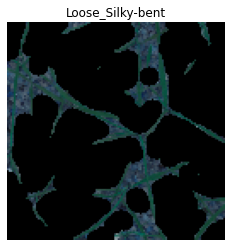

In [ ]:
plt.imshow(X_test[59].reshape(128,128,3), cmap='Greys_r')
i=y_test[59]
i=np.argmax(i)
plot_visualize(i)

In [ ]:
res=model.predict(X_test[59].reshape(1, 128, 128, 3))

In [ ]:
i=np.argmax(res)
Display_predictions(i)

Loose_Silky-bent


- The Model has predicted the plant species 'Loose_Silky-bent' correctly.

### **Conclusion**

The Model created is mostly able to predict a plant's species from a photo except for some species like Black Grass. 
But still there is scope for improvement in the test accuracy and F1 score of the CNN model. 
Different architectures can be built and hyperparamter tuning can be performed to obtain a better Plant Seedling classifier.